# The Pi-Mu-e Experiment

###### Chelsey McMichael and Jelena Colon

# Abstract

The purpose of this experiment was to determine the masses of a pion and a muon by analyzing photographs of the bubble chamber in which they decayed. The photographs are visual records of a pion being accelerated in an electric field and decaying into a muon. The muon then travels for a short distance and decays into a positron. By measuring the radius of the trajectory of a positron, and the length of the path of the muon, we determined their masses to be 146.63 MeV/c^2 and 109.97 MeV/c^2, respectively. Compared to the theoretical value, our error in measurement for the mass of the muon was calculated to be 3.747% and for the mass of the pion it was calculated to be 4.734%. We also used the plastic scintillator to measure the averaged mean muon lifetime. 

# Introduction

Prior to 1937, the fundamental particles of matter consisted of neutrons, electrons, and protons. The muon was proven to exist by J. C. Street and E. C. Stevenson. Ultimately, this raised more questions and led to the discovery of the pion. In this experiment, we measured the mass of the pion and the muon.The pion and the muon are found to both decay into different particles. 

\begin{equation}
\\{\pi^+}{\rightarrow}{\mu^+}+{\upsilon}~~~~~~~~{(1)}
\end{equation}

###### Equation 1 shows the decay of the pion into a meson and a neutrino

\begin{equation}
\\{\mu^+}{\rightarrow}{e^+}+{\upsilon}+{\upsilon^{'}}~~~{(2)}
\end{equation}

###### Equation 2 shows the decay of the muon into a positron and two neutrinos



The photographs used in this experiment are visual records of the trail of ionization left by a charged particle in a bubble chamber. This allows us to examine the trajectory of the particle which would change when it decays into a new particle. In the photographs we examined, a pion was accelerated through the bubble chamber and followed a curved path due to the electric field. Once decayed into a muon there is an abrupt change in trajectory due to the muon traveling for a short distance making it appear as a straight line until it decays into a positron. The decay into a positron again marks an abrupt change in trajectory and it starts to move in a curved path. By measuring the radius of the path of the position and the length of the path of the muon, we are able to determine their approximate masses.

<img src="image_jc_cm.png" height="350" width="350">
###### Fig.1 shows the decays of pions and muons in a hydrogen bubble chamber

# Procedure

We began with analyzing several different photographs of pion-muon decays in a bubble chamber. Within a single photograph there were varying amounts of measurable decay processes. For a single decay process, we first determined which trajectory belonged to the pion, which belonged to the muon and which belonged to the positron. This is evident because the pions ionization path was the darkest and emerged from the left of the photo. Then when it decays into the muon its path changes direction and is so short that it appears to be a straight line. Lastly, the muon decays into a positron and the path changes direction again this time the ionization path was much lighter on the paper. Next, we began taking measurements of that process by finding the radius of the path of the positron in centimeters and the length of the path of the muon in centimeters using a ruler. This was repeated for each and every decay process visible in a photograph and then continued for multiple photographs. We then were able to use the radius of the positrons path to calculate the momentum of the muon and consequently calculate its mass as well as the mass of the pion. As a whole, this data was combined with the data recorded to use to find the mass of the pion and the muon. 

For the second half of the experiment, we relied on the data collection from the plastic scintillator, giving us the timestamp as well as the time in between detections per sample. From this data collections, a histogram of the charge averaged mean muon lifetime could be measured. 

# Data

###### Data Part 1:
data.csv

###### Data Part 2:
exp_data.csv


# Calculations 

In [18]:
from astropy.io import ascii
data=ascii.read("data.csv") #this is the collection of class data

avg = sum(data['radius']) / len(data['radius']) #this takes the radius data, and len prevents blank spaces from being counted
print('The average radius is', data['radius'].mean(), "cm.")

avg1 = sum(data['length']) / len(data['length']) #this is like the statement above
print('The average length is', data['length'].mean(), 'cm.')

The average radius is 10.9 cm.
The average length is 1.01923863636 cm.


In [4]:
#this is the average calculated from the combined measuremnts of the whole class
l_avg =1.01923863636  #cm
r_avg = 10.9  #cm

#c = (3 * 10) ** 10 #cm/s, not needed
c = 1 #speed of light 
r_per = (r_avg) / (0.785) #cm #the perpendicular radius 
rho = .07 #gm/cm^3

l_per = l_avg / .785 #cm #the perpendicular length

m_muon = 3* (2.64 * r_per) /c #MeV/c^2 #mass of the muon measured from the average postiron momentum

T = (2.1*((m_muon)* c **2) * rho * l_per)**.5 #(MeV/cm^2)^.5 #This is used for a nonrelativistic particle 

p_muon = ((T**2) + (2*T*(m_muon)* (c**2)))**.5 #MeV/cm^2 #the momentum of the muon 

m_pion = ((((p_muon * c)**2+ (m_muon * c ** 2) ** 2) **.5) + (p_muon * c ))/ (c **2) #MeV/c^2#this is from the muon momentum


print('The mass of the muon is',m_muon, 'MeV/c^2')

print('The mass of the pion is', m_pion, 'MeV/c^2')

The mass of the muon is 109.971974522293 MeV/c^2
The mass of the pion is 146.6260201304343 MeV/c^2


[  9.99999998e-01   1.00000000e+00   1.83776207e-09]


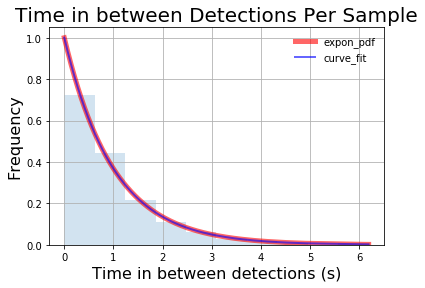

In [11]:
#these are the fuctions that we need 
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon #eponential fit  
from scipy.optimize import curve_fit #curve fit 

data=ascii.read("exp_data.csv") #import data
time_change = data['delta_t']  #variable of histogram

fig, ax = plt.subplots(1, 1)

time_change = np.sort(expon.rvs(size=1000))


def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c
popt, pcov = curve_fit(exponenial_func, time_change, expon.pdf(time_change))

ax.plot(time_change, expon.pdf(time_change),'r-', lw=5, alpha=0.6, label='expon_pdf')
ax.plot(time_change, exponenial_func(time_change, *popt), 'b-', lw=2, alpha=.6, label='curve_fit')

#insert histogram

ax.hist(time_change, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)


#final touches on histogram
plt.title("Time in between Detections Per Sample", fontsize=20)
plt.xlabel("Time in between detections (s)", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.grid(True)

print(popt)

plt.show()


#this is nongaussian

###### To determine the accuracy of the mass calculations, we should determine the percent error in both calculations:

Find the percent error of the mass of the muon using:
\begin{equation}
{\%~{error}}= \frac{|Measured~Value - Theoretical~Value|}{Theoretical~Value}\times 100
\end{equation}

Substitute the value of each quantity into the equation:

\begin{equation}
{\%~{error}}= \frac{|109.971974522293~MeV/c^2 - 106~MeV/c^2|}{106~m/s}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= \frac{|3.97197~MeV/c^2|}{106~MeV/c^2}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {0.037471}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {3.74715\%}
\end{equation}

Thus, the percentage of error is 3.747%


Find the percent error of the mass of the pion using:

\begin{equation}
{\%~{error}}= \frac{|Measured~Value - Theoretical~Value|}{Theoretical~Value}\times 100
\end{equation}

Substitute the value of each quantity into the equation:

\begin{equation}
{\%~{error}}= \frac{|146.626~MeV/c^2 - 140~MeV/c^2|}{140~MeV/c^2}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= \frac{|6.6260~MeV/c^2|}{140~MeV/c^2}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {0.047329023655}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {4.73286\%}
\end{equation}

Thus, the percentage of error is 4.734%.

# Conclusion

As stated previously, we calculated the mass of the muon and the mass of the pion using the length of the path of the muon, and the radius of curvature of the positron from many different bubble chamber photographs. Using the average curvature of the positrons gave the average positron momentum, thus allowing us to calculate the mass of the muon. Also, the length of the muon path average allowed us to calculate the muon momentum, ultimately giving us the ability to calculate the mass of the pion. In this experiment, we calculated the mass of the the muon to be 109.97 MeV/c^2, giving us a percent error of 3.747%. The mass of the pion was measured to be 146.626 MeV/c^2, which gave a percent error of 4.734% in this measurement. Based on the percent difference of both the pion and the muon, this experiment could be considered successful. Besides having a low percentage in error, both percentages are rather close to each other in magnitude. This expeirment could have been improved if there was an uncertainty in our measurements. For instance, when measuring the radius of curvature and the length of the track, we could have calculated uncertainty in the instruments, and uncertainty in our determinations of data measurements. For the second part of the lab, there could have been an uncertainty in the technology that we used when it calculated the time in between detections. This would have been very difficult to do because of the way the data was collected. Each group collected their data separately, so there would have been many different uncertainties. 

# References

https://www.w3schools.com/tags/att_img_width.asp

http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

http://localhost:8888/notebooks/sample_notebook.ipynb

http://hyperphysics.phy-astr.gsu.edu/hbase/Particles/muonhist.html